In [36]:
import os
import fnmatch

import pandas as pd
from datetime import datetime
from scipy.stats import binned_statistic_2d

from GHEAnalysisLib import import_all_spain_data_sets_in_dir_to_dataframe
from GHEAnalysisLib import load_stored_dataframes_from_csv_to_single_dataframe
from GHEAnalysisLib import write_annual_csv_files
from GHEAnalysisLib import get_spain_resource_files

import matplotlib.pyplot as plt
%matplotlib inline

from CoolProp.CoolProp import PropsSI

import numpy as np

plt.style.use('ggplot')

In [18]:
# data_2005 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2005'
# df_2005 = import_all_spain_data_sets_in_dir_to_dataframe(data_2005)

In [19]:
# data_2006 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2006'
# df_2006 = import_all_spain_data_sets_in_dir_to_dataframe(data_2006)

In [5]:
# data_2007 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2007'
# df_2007 = import_all_spain_data_sets_in_dir_to_dataframe(data_2007)

17_04_2007.xlsx
18_04_2007.xlsx
19_04_2007.xlsx
20_04_2007.xlsx
21_04_2007.xlsx
22_04_2007.xlsx
23_04_2007.xlsx
24_04_2007.xlsx
25_04_2007.xlsx
01_08_2007.xlsx
02_08_2007.xlsx
03_08_2007.xlsx
04_08_2007.xlsx
05_08_2007.xlsx
06_08_2007.xlsx
07_08_2007.xlsx
01_12_2007.xlsx
02_12_2007.xlsx
03_12_2007.xlsx
04_12_2007.xlsx
05_12_2007.xlsx
06_12_2007.xlsx
07_12_2007.xlsx
08_12_2007.xlsx
09_12_2007.xlsx
10_12_2007.xlsx
11_12_2007.xlsx
12_12_2007.xlsx
13_12_2007.xlsx
14_12_2007.xlsx
15_12_2007.xlsx
16_12_2007.xlsx
17_12_2007.xlsx
18_12_2007.xlsx
19_12_2007.xlsx
20_12_2007.xlsx
21_12_2007.xlsx
22_12_2007.xlsx
23_12_2007.xlsx
24_12_2007.xlsx
25_12_2007.xlsx
26_12_2007.xlsx
27_12_2007.xlsx
28_12_2007.xlsx
29_12_2007.xlsx
30_12_2007.xlsx
31_12_2007.xlsx
06_02_2007.xlsx
07_02_2007.xlsx
08_02_2007.xlsx
09_02_2007.xlsx
10_02_2007.xlsx
11_02_2007.xlsx
12_02_2007.xlsx
13_02_2007.xlsx
14_02_2007.xlsx
15_02_2007.xlsx
16_02_2007.xlsx
17_02_2007.xlsx
18_02_2007.xlsx
19_02_2007.xlsx
20_02_2007.xlsx
21_02_20

In [6]:
# data_2008 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2008'
# df_2008 = import_all_spain_data_sets_in_dir_to_dataframe(data_2008)

01_04_2008.xlsx
02_04_2008.xlsx
03_04_2008.xlsx
04_04_2008.xlsx
05_04_2008.xlsx
06_04_2008.xlsx
07_04_2008.xlsx
08_04_2008.xlsx
09_04_2008.xlsx
10_04_2008.xlsx
11_04_2008.xlsx
12_04_2008.xlsx
13_04_2008.xlsx
14_04_2008.xlsx
15_04_2008.xlsx
16_04_2008.xlsx
17_04_2008.xlsx
18_04_2008.xlsx
19_04_2008.xlsx
20_04_2008.xlsx
21_04_2008.xlsx
22_04_2008.xlsx
23_04_2008.xlsx
24_04_2008.xlsx
25_04_2008.xlsx
26_04_2008.xlsx
27_04_2008.xlsx
28_04_2008.xlsx
29_04_2008.xlsx
30_04_2008.xlsx
01_08_2008.xlsx
02_08_2008.xlsx
03_08_2008.xlsx
04_08_2008.xlsx
05_08_2008.xlsx
06_08_2008.xlsx
07_08_2008.xlsx
08_08_2008.xlsx
09_08_2008.xlsx
10_08_2008.xlsx
11_08_2008.xlsx
12_08_2008.xlsx
13_08_2008.xlsx
14_08_2008.xlsx
15_08_2008.xlsx
16_08_2008.xlsx
17_08_2008.xlsx
18_08_2008.xlsx
19_08_2008.xlsx
20_08_2008.xlsx
21_08_2008.xlsx
22_08_2008.xlsx
23_08_2008.xlsx
24_08_2008.xlsx
25_08_2008.xlsx
26_08_2008.xlsx
27_08_2008.xlsx
28_08_2008.xlsx
29_08_2008.xlsx
30_08_2008.xlsx
31_08_2008.xlsx
01_12_2008.xlsx
02_12_20

In [7]:
# data_2009 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2009'
# df_2009 = import_all_spain_data_sets_in_dir_to_dataframe(data_2009)

01_04_2009.xlsx
02_04_2009.xlsx
03_04_2009.xlsx
06_04_2009.xlsx
07_04_2009.xlsx
08_04_2009.xlsx
09_04_2009.xlsx
10_04_2009.xlsx
13_04_2009.xlsx
14_04_2009.xlsx
15_04_2009.xlsx
16_04_2009.xlsx
17_04_2009.xlsx
18_04_2009.xlsx
30_04_2009.xlsx
01_08_2009.xlsx
02_08_2009.xlsx
03_08_2009.xlsx
04_08_2009.xlsx
05_08_2009.xlsx
06_08_2009.xlsx
07_08_2009.xlsx
08_08_2009.xlsx
09_08_2009.xlsx
10_08_2009.xlsx
11_08_2009.xlsx
12_08_2009.xlsx
13_08_2009.xlsx
14_08_2009.xlsx
15_08_2009.xlsx
16_08_2009.xlsx
17_08_2009.xlsx
18_08_2009.xlsx
19_08_2009.xlsx
20_08_2009.xlsx
21_08_2009.xlsx
22_08_2009.xlsx
23_08_2009.xlsx
24_08_2009.xlsx
25_08_2009.xlsx
26_08_2009.xlsx
27_08_2009.xlsx
28_08_2009.xlsx
29_08_2009.xlsx
30_08_2009.xlsx
31_08_2009.xlsx
01_12_2009.xlsx
02_12_2009.xlsx
03_12_2009.xlsx
04_12_2009.xlsx
05_12_2009.xlsx
06_12_2009.xlsx
07_12_2009.xlsx
08_12_2009.xlsx
09_12_2009.xlsx
10_12_2009.xlsx
11_12_2009.xlsx
12_12_2009.xlsx
13_12_2009.xlsx
14_12_2009.xlsx
15_12_2009.xlsx
16_12_2009.xlsx
17_12_20

In [8]:
# data_2010= 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2010'
# df_2010 = import_all_spain_data_sets_in_dir_to_dataframe(data_2010)

01_04_2010.xlsx
02_04_2010.xlsx
03_04_2010.xlsx
04_04_2010.xlsx
05_04_2010.xlsx
06_04_2010.xlsx
07_04_2010.xlsx
08_04_2010.xlsx
09_04_2010.xlsx
10_04_2010.xlsx
11_04_2010.xlsx
12_04_2010.xlsx
19_04_2010.xlsx
20_04_2010.xlsx
21_04_2010.xlsx
22_04_2010.xlsx
23_04_2010.xlsx
24_04_2010.xlsx
25_04_2010.xlsx
26_04_2010.xlsx
27_04_2010.xlsx
28_04_2010.xlsx
29_04_2010.xlsx
30_04_2010.xlsx
01_08_2010.xlsx
02_08_2010.xlsx
03_08_2010.xlsx
04_08_2010.xlsx
05_08_2010.xlsx
06_08_2010.xlsx
07_08_2010.xlsx
08_08_2010.xlsx
09_08_2010.xlsx
10_08_2010.xlsx
11_08_2010.xlsx
12_08_2010.xlsx
13_08_2010.xlsx
14_08_2010.xlsx
15_08_2010.xlsx
16_08_2010.xlsx
01_12_2010.xlsx
02_12_2010.xlsx
03_12_2010.xlsx
04_12_2010.xlsx
05_12_2010.xlsx
06_12_2010.xlsx
07_12_2010.xlsx
08_12_2010.xlsx
09_12_2010.xlsx
10_12_2010.xlsx
12_12_2010.xlsx
13_12_2010.xlsx
14_12_2010.xlsx
15_12_2010.xlsx
16_12_2010.xlsx
17_12_2010.xlsx
18_12_2010.xlsx
19_12_2010.xlsx
20_12_2010.xlsx
21_12_2010.xlsx
22_12_2010.xlsx
23_12_2010.xlsx
24_12_20

In [9]:
# data_2011_a = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database\\2011'
# df_2011_a = import_all_spain_data_sets_in_dir_to_dataframe(data_2011_a)

05_04_2011.xlsx
06_04_2011.xlsx
07_04_2011.xlsx
08_04_2011.xlsx
09_04_2011.xlsx
10_04_2011.xlsx
11_04_2011.xlsx
12_04_2011.xlsx
13_04_2011.xlsx
14_04_2011.xlsx
15_04_2011.xlsx
16_04_2011.xlsx
17_04_2011.xlsx
18_04_2011.xlsx
19_04_2011.xlsx
01_02_2011.xlsx
02_02_2011.xlsx
03_02_2011.xlsx
04_02_2011.xlsx
05_02_2011.xlsx
06_02_2011.xlsx
07_02_2011.xlsx
08_02_2011.xlsx
09_02_2011.xlsx
10_02_2011.xlsx
11_02_2011.xlsx
12_02_2011.xlsx
13_02_2011.xlsx
14_02_2011.xlsx
15_02_2011.xlsx
16_02_2011.xlsx
17_02_2011.xlsx
18_02_2011.xlsx
19_02_2011.xlsx
20_02_2011.xlsx
21_02_2011.xlsx
22_02_2011.xlsx
23_02_2011.xlsx
24_02_2011.xlsx
25_02_2011.xlsx
26_02_2011.xlsx
27_02_2011.xlsx
28_02_2011.xlsx
04_01_2011.xlsx
05_01_2011.xlsx
06_01_2011.xlsx
07_01_2011.xlsx
08_01_2011.xlsx
09_01_2011.xlsx
10_01_2011.xlsx
11_01_2011.xlsx
12_01_2011.xlsx
13_01_2011.xlsx
14_01_2011.xlsx
15_01_2011.xlsx
16_01_2011.xlsx
17_01_2011.xlsx
18_01_2011.xlsx
19_01_2011.xlsx
20_01_2011.xlsx
21_01_2011.xlsx
22_01_2011.xlsx
23_01_20

In [10]:
# data_2011_b = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2011'
# df_2011_b = import_all_spain_data_sets_in_dir_to_dataframe(data_2011_b)

01_04_2011.xlsx
02_04_2011.xlsx
03_04_2011.xlsx
04_04_2011.xlsx
05_04_2011.xlsx
06_04_2011.xlsx
07_04_2011.xlsx
08_04_2011.xlsx
09_04_2011.xlsx
10_04_2011.xlsx
11_04_2011.xlsx
12_04_2011.xlsx
13_04_2011.xlsx
14_04_2011.xlsx
15_04_2011.xlsx
16_04_2011.xlsx
17_04_2011.xlsx
18_04_2011.xlsx
19_04_2011.xlsx
20_04_2011.xlsx
21_04_2011.xlsx
22_04_2011.xlsx
23_04_2011.xlsx
24_04_2011.xlsx
25_04_2011.xlsx
26_04_2011.xlsx
27_04_2011.xlsx
28_04_2011.xlsx
01_08_2011.xlsx
04_08_2011.xlsx
05_08_2011.xlsx
06_08_2011.xlsx
07_08_2011.xlsx
25_08_2011.xlsx
26_08_2011.xlsx
27_08_2011.xlsx
28_08_2011.xlsx
29_08_2011.xlsx
30_08_2011.xlsx
31_08_2011.xlsx
01_12_2011.xlsx
02_12_2011.xlsx
03_12_2011.xlsx
04_12_2011.xlsx
05_12_2011.xlsx
06_12_2011.xlsx
07_12_2011.xlsx
08_12_2011.xlsx
09_12_2011.xlsx
10_12_2011.xlsx
11_12_2011.xlsx
12_12_2011.xlsx
13_12_2011.xlsx
14_12_2011.xlsx
15_12_2011.xlsx
16_12_2011.xlsx
17_12_2011.xlsx
18_12_2011.xlsx
19_12_2011.xlsx
20_12_2011.xlsx
21_12_2011.xlsx
22_12_2011.xlsx
23_12_20

In [2]:
# data_2012 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2012'
# df_2012 = import_all_spain_data_sets_in_dir_to_dataframe(data_2012)

01_04_2012.xlsx
02_04_2012.xlsx
03_04_2012.xlsx
04_04_2012.xlsx
05_04_2012.xlsx
06_04_2012.xlsx
07_04_2012.xlsx
08_04_2012.xlsx
09_04_2012.xlsx
10_04_2012.xlsx
11_04_2012.xlsx
12_04_2012.xlsx
13_04_2012.xlsx
14_04_2012.xlsx
15_04_2012.xlsx
16_04_2012.xlsx
17_04_2012.xlsx
18_04_2012.xlsx
19_04_2012.xlsx
20_04_2012.xlsx
21_04_2012.xlsx
22_04_2012.xlsx
23_04_2012.xlsx
24_04_2012.xlsx
25_04_2012.xlsx
26_04_2012.xlsx
27_04_2012.xlsx
01_12_2012.xlsx
02_12_2012.xlsx
03_12_2012.xlsx
04_12_2012.xlsx
05_12_2012.xlsx
06_12_2012.xlsx
07_12_2012.xlsx
08_12_2012.xlsx
09_12_2012.xlsx
10_12_2012.xlsx
11_12_2012.xlsx
12_12_2012.xlsx
13_12_2012.xlsx
14_12_2012.xlsx
15_12_2012.xlsx
16_12_2012.xlsx
17_12_2012.xlsx
18_12_2012.xlsx
19_12_2012.xlsx
20_12_2012.xlsx
21_12_2012.xlsx
22_12_2012.xlsx
23_12_2012.xlsx
24_12_2012.xlsx
25_12_2012.xlsx
26_12_2012.xlsx
27_12_2012.xlsx
28_12_2012.xlsx
29_12_2012.xlsx
30_12_2012.xlsx
01_02_2012.xlsx
02_02_2012.xlsx
03_02_2012.xlsx
04_02_2012.xlsx
05_02_2012.xlsx
06_02_20

In [11]:
# data_2013 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2013'
# df_2013 = import_all_spain_data_sets_in_dir_to_dataframe(data_2013)

01_04_2013.xlsx
02_04_2013.xlsx
03_04_2013.xlsx
04_04_2013.xlsx
05_04_2013.xlsx
06_04_2013.xlsx
07_04_2013.xlsx
08_04_2013.xlsx
09_04_2013.xlsx
10_04_2013.xlsx
11_04_2013.xlsx
12_04_2013.xlsx
13_04_2013.xlsx
14_04_2013.xlsx
15_04_2013.xlsx
16_04_2013.xlsx
17_04_2013.xlsx
18_04_2013.xlsx
19_04_2013.xlsx
20_04_2013.xlsx
21_04_2013.xlsx
22_04_2013.xlsx
23_04_2013.xlsx
24_04_2013.xlsx
25_04_2013.xlsx
26_04_2013.xlsx
27_04_2013.xlsx
28_04_2013.xlsx
29_04_2013.xlsx
01_08_2013.xlsx
02_08_2013.xlsx
03_08_2013.xlsx
04_08_2013.xlsx
05_08_2013.xlsx
06_08_2013.xlsx
07_08_2013.xlsx
08_08_2013.xlsx
09_08_2013.xlsx
10_08_2013.xlsx
11_08_2013.xlsx
12_08_2013.xlsx
13_08_2013.xlsx
14_08_2013.xlsx
15_08_2013.xlsx
16_08_2013.xlsx
17_08_2013.xlsx
18_08_2013.xlsx
19_08_2013.xlsx
20_08_2013.xlsx
21_08_2013.xlsx
22_08_2013.xlsx
23_08_2013.xlsx
24_08_2013.xlsx
25_08_2013.xlsx
26_08_2013.xlsx
27_08_2013.xlsx
28_08_2013.xlsx
29_08_2013.xlsx
30_08_2013.xlsx
01_12_2013.xlsx
02_12_2013.xlsx
03_12_2013.xlsx
04_12_20

In [12]:
# data_2014 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2014'
# df_2014 = import_all_spain_data_sets_in_dir_to_dataframe(data_2014)

01_04_2014.xlsx
02_04_2014.xlsx
03_04_2014.xlsx
04_04_2014.xlsx
05_04_2014.xlsx
06_04_2014.xlsx
07_04_2014.xlsx
08_04_2014.xlsx
09_04_2014.xlsx
10_04_2014.xlsx
11_04_2014.xlsx
12_04_2014.xlsx
13_04_2014.xlsx
14_04_2014.xlsx
15_04_2014.xlsx
16_04_2014.xlsx
17_04_2014.xlsx
18_04_2014.xlsx
19_04_2014.xlsx
20_04_2014.xlsx
21_04_2014.xlsx
22_04_2014.xlsx
23_04_2014.xlsx
24_04_2014.xlsx
25_04_2014.xlsx
26_04_2014.xlsx
27_04_2014.xlsx
28_04_2014.xlsx
29_04_2014.xlsx
30_04_2014.xlsx
01_08_2014.xlsx
02_08_2014.xlsx
03_08_2014.xlsx
04_08_2014.xlsx
05_08_2014.xlsx
06_08_2014.xlsx
07_08_2014.xlsx
08_08_2014.xlsx
09_08_2014.xlsx
10_08_2014.xlsx
11_08_2014.xlsx
12_08_2014.xlsx
13_08_2014.xlsx
14_08_2014.xlsx
15_08_2014.xlsx
16_08_2014.xlsx
17_08_2014.xlsx
18_08_2014.xlsx
19_08_2014.xlsx
20_08_2014.xlsx
21_08_2014.xlsx
22_08_2014.xlsx
23_08_2014.xlsx
24_08_2014.xlsx
25_08_2014.xlsx
26_08_2014.xlsx
27_08_2014.xlsx
28_08_2014.xlsx
29_08_2014.xlsx
30_08_2014.xlsx
31_08_2014.xlsx
01_12_2014.xlsx
02_12_20

In [13]:
# data_2015 = 'D:\\Dropbox\\OSU Courses\\13 Spring 2018\\6010 Data Analysis for Thermal Systems\\Ruiz-Calvo_et_al_2016_data\\database2\\2015'
# df_2015 = import_all_spain_data_sets_in_dir_to_dataframe(data_2015)

01_04_2015.xlsx
02_04_2015.xlsx
03_04_2015.xlsx
04_04_2015.xlsx
05_04_2015.xlsx
06_04_2015.xlsx
07_04_2015.xlsx
08_04_2015.xlsx
09_04_2015.xlsx
10_04_2015.xlsx
11_04_2015.xlsx
12_04_2015.xlsx
13_04_2015.xlsx
14_04_2015.xlsx
15_04_2015.xlsx
16_04_2015.xlsx
17_04_2015.xlsx
18_04_2015.xlsx
19_04_2015.xlsx
20_04_2015.xlsx
21_04_2015.xlsx
22_04_2015.xlsx
23_04_2015.xlsx
24_04_2015.xlsx
25_04_2015.xlsx
26_04_2015.xlsx
27_04_2015.xlsx
28_04_2015.xlsx
29_04_2015.xlsx
30_04_2015.xlsx
01_08_2015.xlsx
02_08_2015.xlsx
03_08_2015.xlsx
04_08_2015.xlsx
05_08_2015.xlsx
06_08_2015.xlsx
07_08_2015.xlsx
08_08_2015.xlsx
09_08_2015.xlsx
10_08_2015.xlsx
11_08_2015.xlsx
12_08_2015.xlsx
13_08_2015.xlsx
14_08_2015.xlsx
15_08_2015.xlsx
16_08_2015.xlsx
17_08_2015.xlsx
18_08_2015.xlsx
19_08_2015.xlsx
20_08_2015.xlsx
21_08_2015.xlsx
22_08_2015.xlsx
23_08_2015.xlsx
24_08_2015.xlsx
25_08_2015.xlsx
26_08_2015.xlsx
27_08_2015.xlsx
28_08_2015.xlsx
29_08_2015.xlsx
30_08_2015.xlsx
31_08_2015.xlsx
01_02_2015.xlsx
02_02_20

In [21]:
# See example here for how to read/write HDF5 data
# https://stackoverflow.com/a/17098736/5965685

# df_2005.to_csv('.\\UPV_Data\\2005_Raw.csv')

In [22]:
# df_2006.to_csv('.\\UPV_Data\\2006_Raw.csv')

In [23]:
# df_2007.to_csv('.\\UPV_Data\\2007_Raw.csv')

In [24]:
# df_2008.to_csv('.\\UPV_Data\\2008_Raw.csv')

In [25]:
# df_2009.to_csv('.\\UPV_Data\\2009_Raw.csv')

In [26]:
# df_2010.to_csv('.\\UPV_Data\\2010_Raw.csv')

In [27]:
# df_2011_a.to_csv('.\\UPV_Data\\2011_a_Raw.csv')

In [28]:
# df_2011_b.to_csv('.\\UPV_Data\\2011_b_Raw.csv')

In [29]:
# df_2012.to_csv('.\\UPV_Data\\2012_Raw.csv')

In [30]:
# df_2013.to_csv('.\\UPV_Data\\2013_Raw.csv')

In [31]:
# df_2014.to_csv('.\\UPV_Data\\2014_Raw.csv')

In [32]:
# df_2015.to_csv('.\\UPV_Data\\2015_Raw.csv')

In [2]:
df_raw = load_stored_dataframes_from_csv_to_single_dataframe('.\\UPV_Data')

Reading 2005_Raw.csv
Reading 2006_Raw.csv
Reading 2007_Raw.csv
Reading 2008_Raw.csv
Reading 2009_Raw.csv
Reading 2010_Raw.csv
Reading 2011_a_Raw.csv
Reading 2011_b_Raw.csv
Reading 2012_Raw.csv
Reading 2013_Raw.csv
Reading 2014_Raw.csv
Reading 2015_Raw.csv
Dataframes loaded successfully


In [3]:
df_raw.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,Mass Flow Rate IC (kg/h),P_EC(kW),P_ECP(kW),P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:01:14,33.534,38.276,19.074,19.065,0.09010,2783.87875,0.000608,0.31464,18.953,19.13,...,0.09010,0.000608,NaN,0.31464,NaN,18.363,18.401,18.647,18.927,NaN
2005-02-01 00:02:14,33.539,38.207,19.076,19.063,0.08495,2782.90075,0.000641,0.31467,18.936,19.13,...,0.08495,0.000608,NaN,0.31464,NaN,18.353,18.395,18.665,18.931,NaN


In [4]:
df_ref = get_spain_resource_files('..\\Ruiz-Calvo_et_al_2016_data')

In [5]:
df_ref.head(2)

,Sys Working,Representative Data,STD/OPT
2005-01-01,OFF,NO,NaN
2005-01-02,OFF,NO,NaN


In [9]:
# https://stackoverflow.com/questions/49182288/combine-dataframes-with-minute-and-date-indexes

# df_merge = pd.merge_asof(df_raw, df_ref, left_index=True, right_index=True)
df_merge.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),Sys Working,Representative Data,STD/OPT
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:01:14,33.534,38.276,19.074,19.065,0.09010,2783.87875,0.000608,0.31464,18.953,19.13,...,0.31464,NaN,18.363,18.401,18.647,18.927,NaN,ON,YES,NaN
2005-02-01 00:02:14,33.539,38.207,19.076,19.063,0.08495,2782.90075,0.000641,0.31467,18.936,19.13,...,0.31464,NaN,18.353,18.395,18.665,18.931,NaN,ON,YES,NaN


In [12]:
mask = df_merge['Representative Data'] == 'YES'

In [14]:
df_valid = df_merge[mask]
df_valid.head(2)

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),Sys Working,Representative Data,STD/OPT
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:01:14,33.534,38.276,19.074,19.065,0.09010,2783.87875,0.000608,0.31464,18.953,19.13,...,0.31464,NaN,18.363,18.401,18.647,18.927,NaN,ON,YES,NaN
2005-02-01 00:02:14,33.539,38.207,19.076,19.063,0.08495,2782.90075,0.000641,0.31467,18.936,19.13,...,0.31464,NaN,18.353,18.395,18.665,18.931,NaN,ON,YES,NaN


In [15]:
write_annual_csv_files(df_valid, 2005, 2015, '.\\UPV_Data', 'Raw_DeDuped_Valid')

Writing year: 2005
Writing year: 2006
Writing year: 2007
Writing year: 2008
Writing year: 2009
Writing year: 2010
Writing year: 2011
Writing year: 2012
Writing year: 2013
Writing year: 2014
Writing year: 2015


In [ ]:
# To aggregate the data into hourly blocks, see the the pd.resample function:
# http://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.resample.html

In [7]:
df_valid = df_valid.resample('60T').mean()

,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,Mass Flow Rate IC (kg/h),P_EC(kW),P_ECP(kW),P_IC(kW),P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C)
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:00:00,32.393542,36.851034,19.065186,19.054915,0.104320,2786.579441,0.000613,0.321751,18.903898,19.121169,...,0.104320,0.000614,NaN,0.321593,NaN,18.350966,18.322085,18.659322,18.933763,NaN
2005-02-01 01:00:00,30.541367,34.362083,19.054300,19.044300,0.100133,2787.471992,0.000578,0.319658,18.897267,19.111933,...,0.100133,0.000578,NaN,0.319658,NaN,18.353750,18.234117,18.659267,18.961250,NaN
2005-02-01 02:00:00,29.114983,32.310633,19.048833,19.039467,0.090783,2785.728108,0.000567,0.316602,18.892233,19.105533,...,0.090783,0.000568,NaN,0.316759,NaN,18.328433,18.275517,18.645833,18.995750,NaN
2005-02-01 03:00:00,27.941383,30.632717,19.042350,19.032733,0.085977,2785.112221,0.000540,0.320023,18.886017,19.102017,...,0.085977,0.000539,NaN,0.319867,NaN,18.328233,18.280600,18.644483,19.015283,NaN
2005-02-01 04:00:00,26.975633,29.256283,19.037083,19.027400,0.084691,2785.656904,0.000534,0.323755,18.881017,19.098950,...,0.084691,0.000534,NaN,0.323755,NaN,18.338533,18.269683,18.633783,19.022933,NaN


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


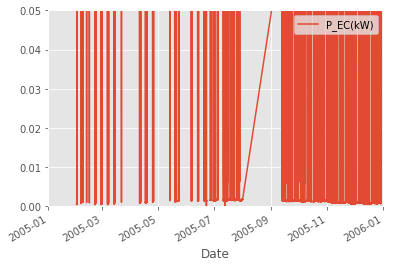

In [21]:
df_valid.plot(y=['P_EC(kW)'], xlim=['2005-01-01', '2006-01-01'], ylim=[0, 0.05])

In [22]:
def is_heat_pump_on(row, threshold):
    if row < threshold:
        return 0
    else:
        return 1

In [30]:
df_valid['Is HP On'] = df_valid['P_EC(kW)'].apply(lambda row: is_heat_pump_on(row, 0.05))
df_valid.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,B1in (C),B1out (C),B2in (C),B2out (C),B3in (C),B3out (C),B4in (C),B4out (C),B5in (C),B5out (C),...,P_ICP(kW),TinEC (C),TinIC (C),ToutEC (C),ToutIC (C),Ttank (C),Sys Working,Representative Data,STD/OPT,Is HP On
Date,,,,,,,,,,,,,,,,,,,,,
2005-02-01 00:01:14,33.534,38.276,19.074,19.065,0.09010,2783.87875,0.000608,0.31464,18.953,19.13,...,NaN,18.363,18.401,18.647,18.927,NaN,ON,YES,NaN,0
2005-02-01 00:02:14,33.539,38.207,19.076,19.063,0.08495,2782.90075,0.000641,0.31467,18.936,19.13,...,NaN,18.353,18.395,18.665,18.931,NaN,ON,YES,NaN,0


In [31]:
df_valid.columns

Index(['B1in (C)', 'B1out (C)', 'B2in (C)', 'B2out (C)', 'B3in (C)',
       'B3out (C)', 'B4in (C)', 'B4out (C)', 'B5in (C)', 'B5out (C)',
       'B6_1 (C)', 'B6_2 (C)', 'B6_3 (C)', 'B6_4 (C)', 'B6_5 (C)', 'B6_6 (C)',
       'B6_7 (C)', 'B6in (C)', 'B6out (C)', 'Mass Flow Rate EC (kg/h)',
       'Mass Flow Rate IC (kg/h)', 'P_EC(kW)', 'P_ECP(kW)', 'P_IC(kW)',
       'P_ICP(kW)', 'TinEC (C)', 'TinIC (C)', 'ToutEC (C)', 'ToutIC (C)',
       'Ttank (C)', 'Sys Working', 'Representative Data', 'STD/OPT',
       'Is HP On'],
      dtype='object')

In [66]:
df_analysis = df_valid[['TinIC (C)', 'ToutIC (C)', 'TinEC (C)', 'ToutEC (C)', 'Mass Flow Rate IC (kg/h)', 'P_EC(kW)', 'Is HP On']]
df_analysis.head(2)

,TinIC (C),ToutIC (C),TinEC (C),ToutEC (C),Mass Flow Rate IC (kg/h),P_EC(kW),Is HP On
Date,,,,,,,
2005-02-01 00:01:14,18.401,18.927,18.363,18.647,0.09010,0.000608,0
2005-02-01 00:02:14,18.395,18.931,18.353,18.665,0.08495,0.000608,0


In [67]:
df_analysis = df_analysis.resample('60T').mean()
df_analysis.head(2)

,TinIC (C),ToutIC (C),TinEC (C),ToutEC (C),Mass Flow Rate IC (kg/h),P_EC(kW),Is HP On
Date,,,,,,,
2005-02-01 00:00:00,18.322085,18.933763,18.350966,18.659322,0.104320,0.000614,0.0
2005-02-01 01:00:00,18.234117,18.961250,18.353750,18.659267,0.100133,0.000578,0.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


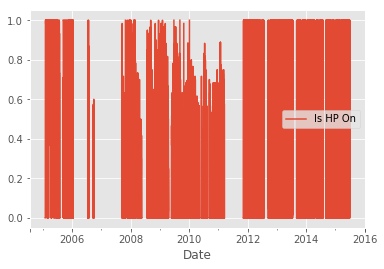

In [68]:
df_analysis.plot(y=['Is HP On'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


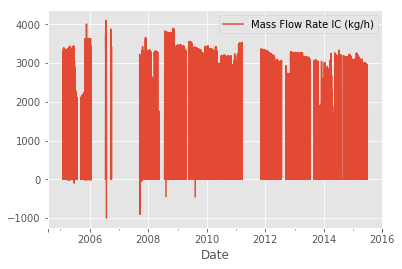

In [69]:
df_analysis.plot(y=['Mass Flow Rate IC (kg/h)'])

In [50]:
def get_cp(temp):
    temp_in_k = temp + 273.15
    return PropsSI('C', 'T', temp_in_k, 'P', 101325, 'Water') / 1000

In [70]:
df_analysis['IC Mean Temp (C)'] = (df_analysis['TinIC (C)'] + df_analysis['ToutIC (C)']) / 2
df_analysis.head(2)

,TinIC (C),ToutIC (C),TinEC (C),ToutEC (C),Mass Flow Rate IC (kg/h),P_EC(kW),Is HP On,IC Mean Temp (C)
Date,,,,,,,,
2005-02-01 00:00:00,18.322085,18.933763,18.350966,18.659322,0.104320,0.000614,0.0,18.627924
2005-02-01 01:00:00,18.234117,18.961250,18.353750,18.659267,0.100133,0.000578,0.0,18.597683


In [71]:
df_analysis.columns = df_analysis.columns.str.replace('Is HP On', 'RT Fraction')
df_analysis.head(2)

,TinIC (C),ToutIC (C),TinEC (C),ToutEC (C),Mass Flow Rate IC (kg/h),P_EC(kW),RT Fraction,IC Mean Temp (C)
Date,,,,,,,,
2005-02-01 00:00:00,18.322085,18.933763,18.350966,18.659322,0.104320,0.000614,0.0,18.627924
2005-02-01 01:00:00,18.234117,18.961250,18.353750,18.659267,0.100133,0.000578,0.0,18.597683


In [72]:
df_analysis = df_analysis[df_analysis['IC Mean Temp (C)'].notnull()]
df_analysis.head(2)

,TinIC (C),ToutIC (C),TinEC (C),ToutEC (C),Mass Flow Rate IC (kg/h),P_EC(kW),RT Fraction,IC Mean Temp (C)
Date,,,,,,,,
2005-02-01 00:00:00,18.322085,18.933763,18.350966,18.659322,0.104320,0.000614,0.0,18.627924
2005-02-01 01:00:00,18.234117,18.961250,18.353750,18.659267,0.100133,0.000578,0.0,18.597683


In [73]:
df_analysis['CP (kJ/kg-K)'] = df_analysis['IC Mean Temp (C)'].apply(get_cp)
df_analysis.head(2)

,TinIC (C),ToutIC (C),TinEC (C),ToutEC (C),Mass Flow Rate IC (kg/h),P_EC(kW),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K)
Date,,,,,,,,,
2005-02-01 00:00:00,18.322085,18.933763,18.350966,18.659322,0.104320,0.000614,0.0,18.627924,4.185072
2005-02-01 01:00:00,18.234117,18.961250,18.353750,18.659267,0.100133,0.000578,0.0,18.597683,4.185096


In [74]:
df_analysis['COP'] = df_analysis['Mass Flow Rate IC (kg/h)'] * df_analysis['CP (kJ/kg-K)'] * abs(df_analysis['TinIC (C)'] - df_analysis['ToutIC (C)']) / (df_analysis['P_EC(kW)'] * 3600)
df_analysis.head(2)

,TinIC (C),ToutIC (C),TinEC (C),ToutEC (C),Mass Flow Rate IC (kg/h),P_EC(kW),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K),COP
Date,,,,,,,,,,
2005-02-01 00:00:00,18.322085,18.933763,18.350966,18.659322,0.104320,0.000614,0.0,18.627924,4.185072,0.120884
2005-02-01 01:00:00,18.234117,18.961250,18.353750,18.659267,0.100133,0.000578,0.0,18.597683,4.185096,0.146345


In [77]:
df_analysis = df_analysis[df_analysis['P_EC(kW)'] > 0.05]
df_analysis.head(2)

,TinIC (C),ToutIC (C),TinEC (C),ToutEC (C),Mass Flow Rate IC (kg/h),P_EC(kW),RT Fraction,IC Mean Temp (C),CP (kJ/kg-K),COP
Date,,,,,,,,,,
2005-02-01 07:00:00,17.178567,18.125833,18.259367,17.927367,3242.927446,3.130755,0.800000,17.6522,4.185881,1.140893
2005-02-01 08:00:00,16.309167,17.282633,17.978850,17.109000,3216.635404,2.667547,0.616667,16.7959,4.186650,1.365133


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


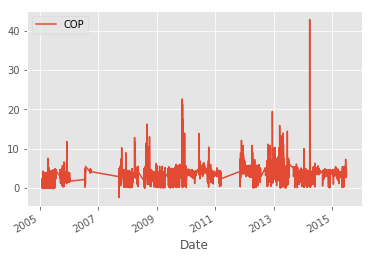

In [78]:
df_analysis.plot(y=['COP'])

In [89]:
binned_statistic_2d(df_analysis['RT Fraction'], df_analysis['TinEC (C)'], df_analysis['COP'], statistic='mean', bins=[[0, 0.25, 0.5, 0.75, 1.0],[5, 15, 25, 35]])

BinnedStatistic2dResult(statistic=array([[ 0.5310107 ,  3.45613633,  3.75613142],
       [ 3.52104564,  3.59247837,  4.20945054],
       [ 3.61450329,  3.81363197,  4.20302026],
       [ 4.48354059,  2.79758836,  4.29209928]]), x_edge=array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]), y_edge=array([  5.,  15.,  25.,  35.]), binnumber=array([22, 17, 12, ..., 23, 23, 23], dtype=int64))

In [93]:
binned_statistic_2d(df_analysis['RT Fraction'], df_analysis['TinEC (C)'], df_analysis['COP'], statistic='mean', bins=[[0, 0.25, 0.5, 0.75, 1.0],[5, 10, 15, 20, 25, 30, 35]]).statistic

array([[        nan,  0.5310107 ,  3.10085297,  3.81601386,  3.76741646,
         2.53734806],
       [        nan,  3.52104564,  3.47890095,  4.20914103,  4.20916042,
         4.58834012],
       [        nan,  3.61450329,  3.82703679,  3.61227444,  4.21825471,
         4.08000466],
       [ 3.7833502 ,  4.49189608,  3.02159861,  1.98639158,  4.32206125,
         4.0830186 ]])